<a href="https://colab.research.google.com/github/4GeeksAcademy/analisis-exploratorio/blob/main/Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Planteamiento del problema y recopilación de datos



In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 2.Exploración y limpieza de datos

In [ ]:
data.shape

(48895, 16)

Esta formado por 48895 filas y 16 columnas


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Contiene 6 variables categoricas, el resto numericas. Las columnas last_review y reviews_per_month tienen mas de 1000 datos perdidos y host_name y name unos pocos

In [ ]:
data.drop("id", axis = 1).duplicated().sum()

0

In [ ]:
data.drop("host_id", axis = 1).duplicated().sum()

0

Ambas variables identificativas no contienen duplicados

Pasamos a eliminar informacion que no nos es relevante


In [ ]:
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data.head(30)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


# 3.Análisis de variables univariante

Variables categoricas


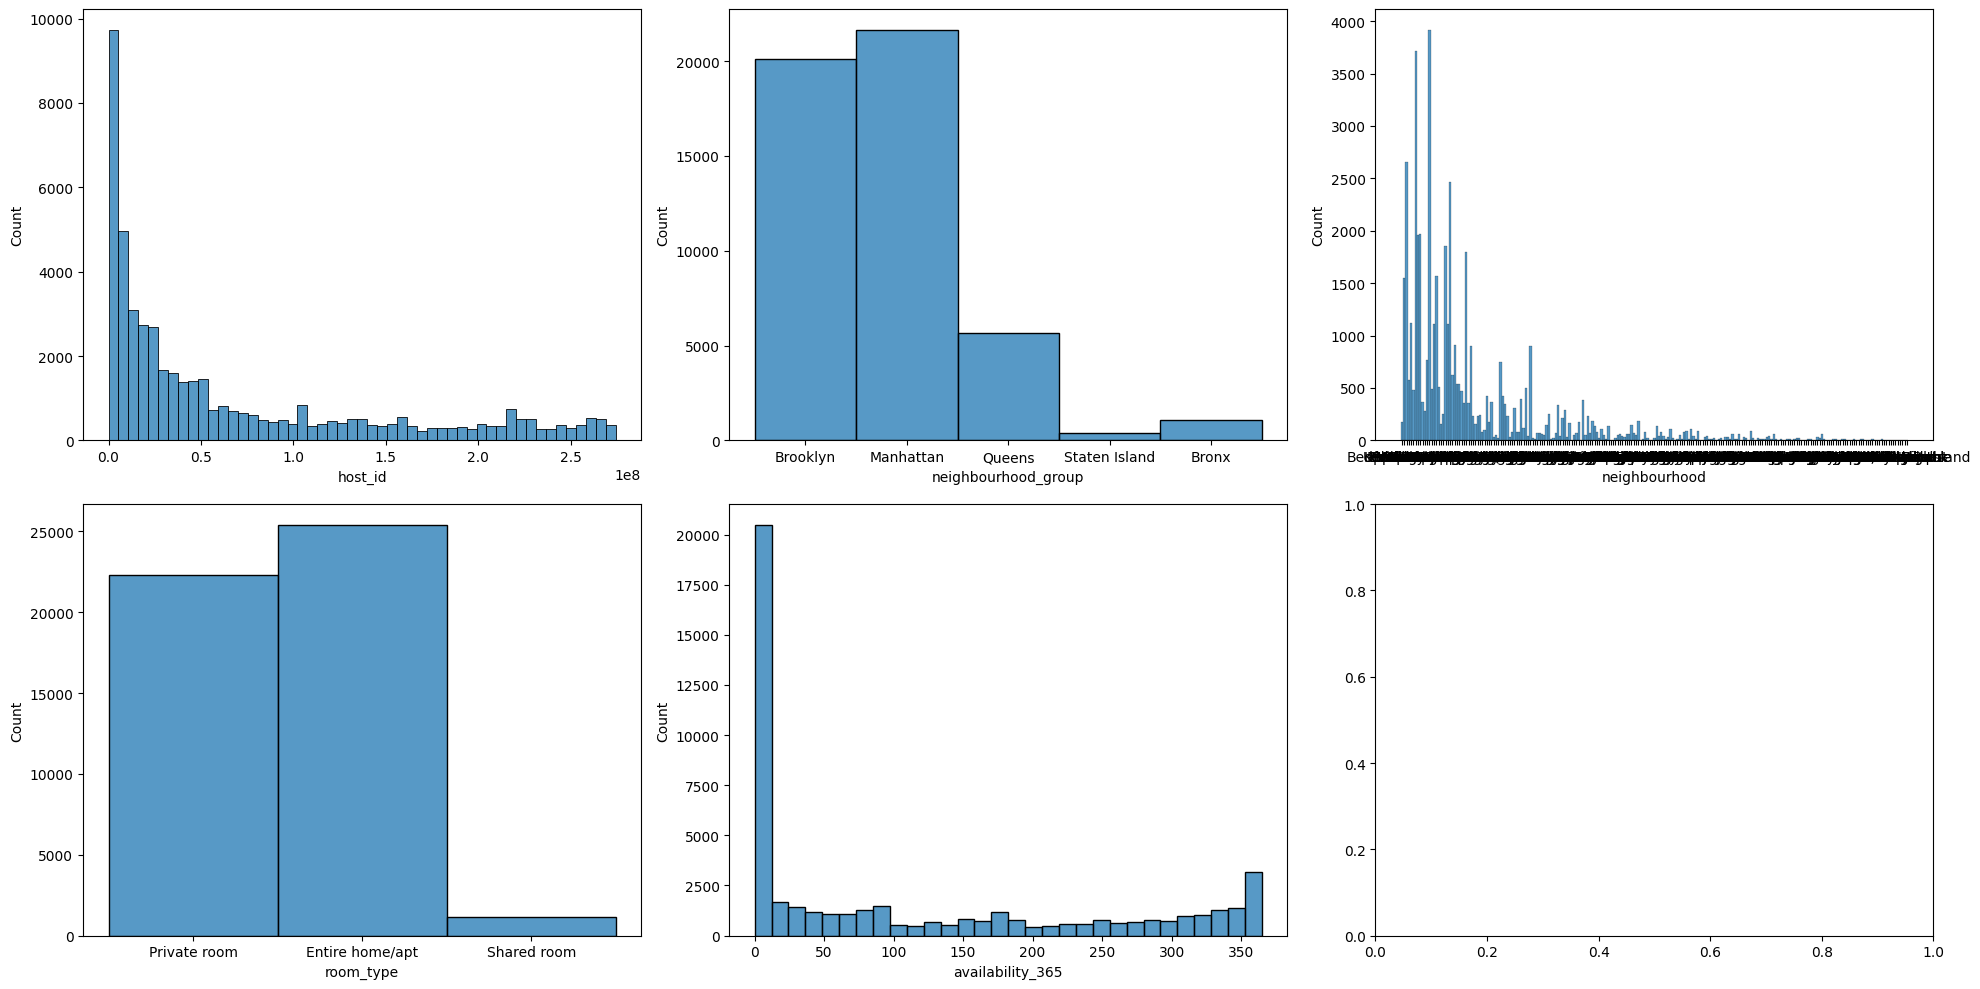

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(20, 10))

# Creamos los histogramas
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood")
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")


# Ajustamos el diseño para que no se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Host id : en primer lugar vemos que tenemos casi 10.000 filas con valor 0, por lo que nos indica que son los valores perdidos que ya habiamos identificado. Otro dato es que hay anfitriones con mas de una habitacion.

Neighbourhood group : podemos diferenciar 5 zonas diferentes

Neighbourhood : hay diferentes barrios y cada uno tiene un numero de alojamientos, 3 de ellos superan los 2.500.

room_type : la oferta de hospedaje que más se encuentra serían las casas/apartamentos completos, seguida de habitaciones privadas y en muy pequeña proporcion estarian las habitaciones compartidas.

avalaible_365 : como en la variable host_id, aqui tambien encontramos datos perdidos. En el eje de x nos muestra la disponibilidad en dias, y hay numerosas propiedades que superan los 350 dias al año.

Variables numéricas

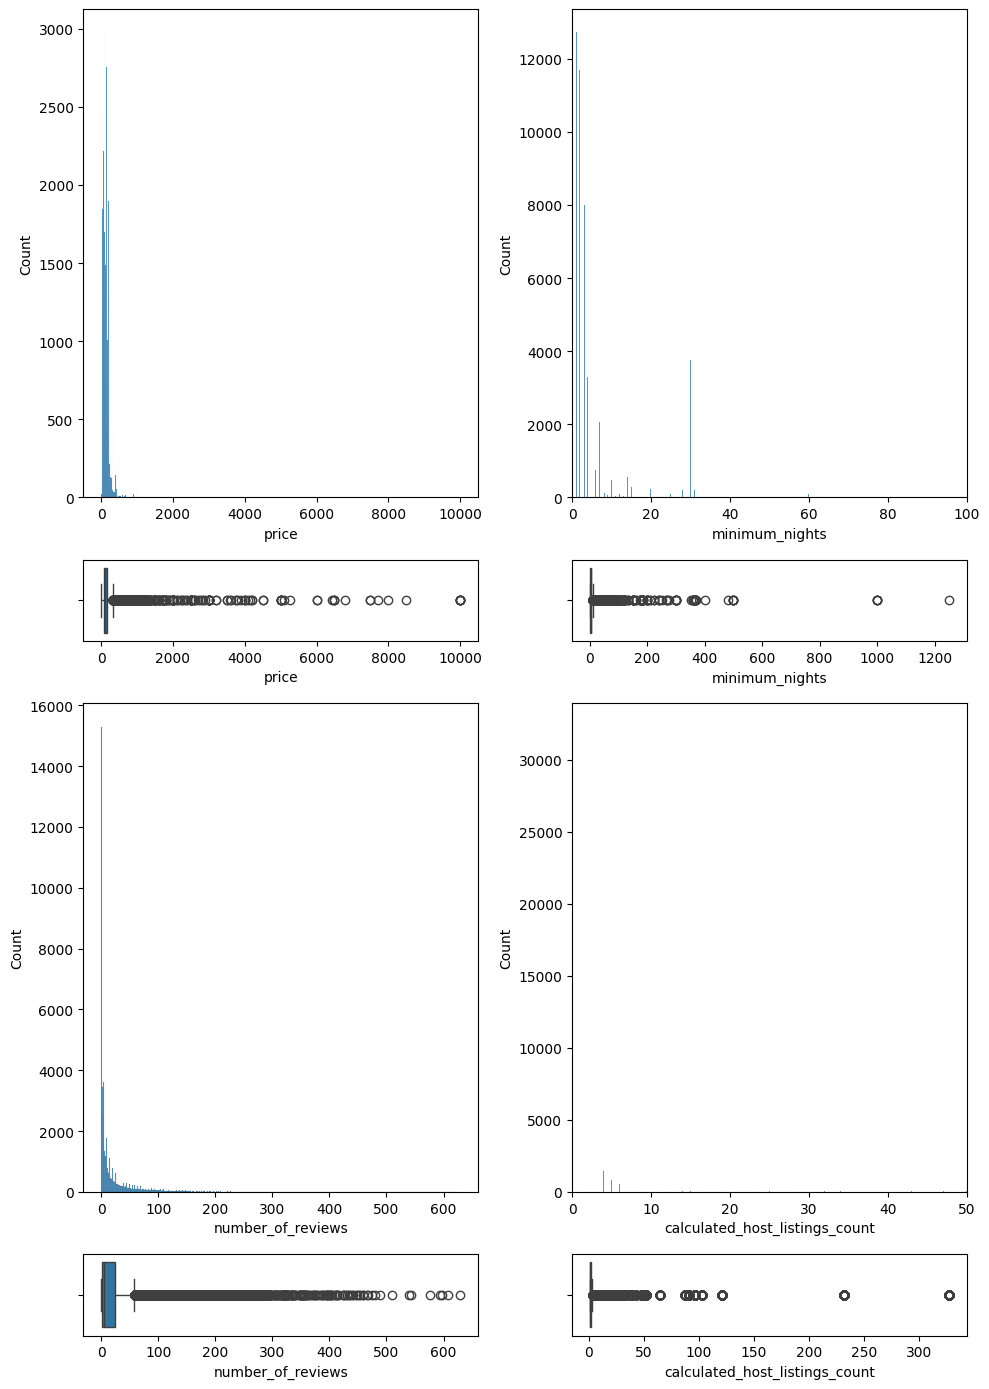

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set_xlim(0, 100)
sns.boxplot(ax = axis[1,1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data, x = "calculated_host_listings_count").set_xlim(0, 50)
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")


plt.tight_layout()

plt.show()

price : la mayoria de alojamientos no superan los 250 dolares, y en el diagrama de cajas vemos que hay una gran cantidad de datos atipicos y el alojamiento mas caro es de 10.000 dolares.

minumun_night : la mayoria de personas optan por una estancia corta de menos de 4 o 5 dias, sin embargo se aprecia otro grupo de casi 4000 personas que se hospedan durante aproximadamente un mes. En el diagrama de cajas vemos que tambien tiene muchisimos datos atipicos.

number_of_review : hay numerosos alojamientos sin reseñas, y casi todos se centran entre 0 y 25 aproximadamente. También tiene numerosos datos atipicos.

calculated_host_listings_count : la gran mayoria no superan la cantidad de 8 y tambien tiene datos atipicos.



# 4.Análisis de variables multivariante

Numericas con numericas.

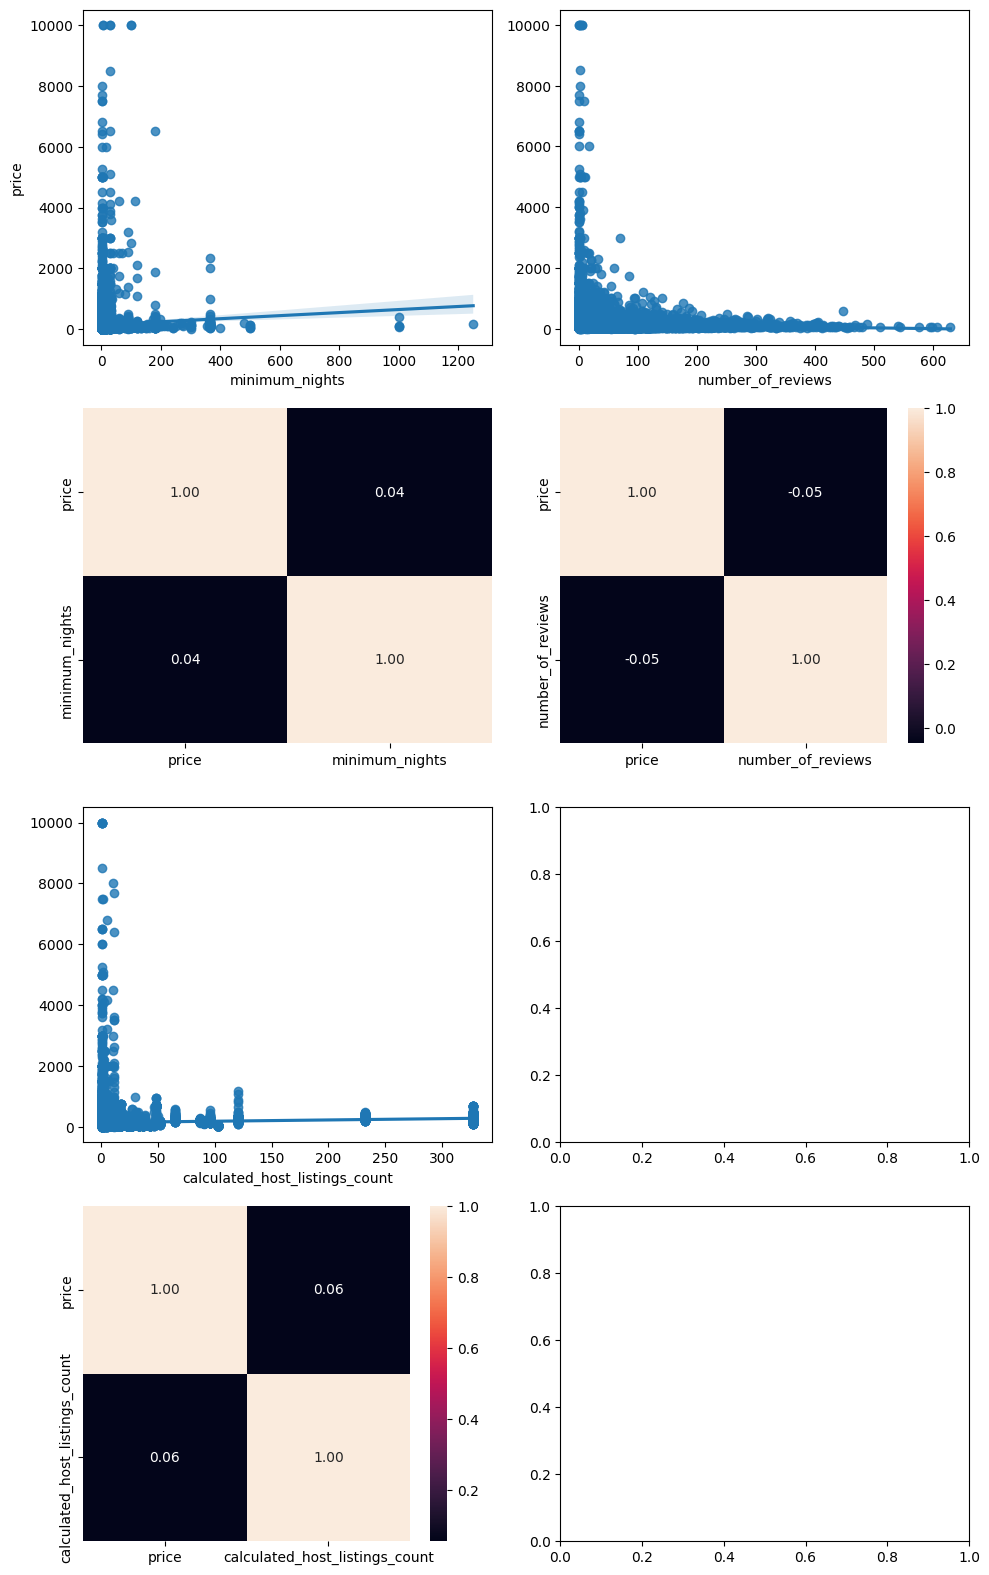

In [ ]:
# Creamos el grafico de dispersion multiple y analizamos el precio con el resto de variables numericas, excepto con la ultiuma pues es irrelevante

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

plt.tight_layout()

plt.show()

Absolutamente ninguna de las variables tiene correlacion con la variable precio

Categoricas con categoricas

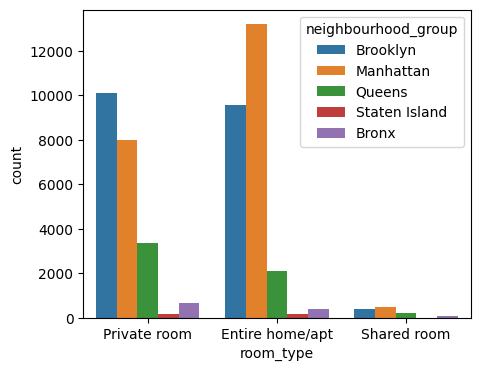

In [ ]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

plt.show()

No existe relacion entre el tipo de alojamiento con respecto a las zonas de Nueva York.

En Manhattan es donde se observan mas casas o apartamentos para alquilar.

Manhattan seguida de Brooklyn son las zonas con mas alojamientos seguida de Queens,le seguiría el Bronx y con muy pocos alojamientos Staten Island-

Análisis numérico-categórico (completo)